<a href="https://colab.research.google.com/github/andres-merino/AprendizajeAutomaticoInicial-05-N0105/blob/main/2-Ejercicios/04-Agrupamiento-kMeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<table style="border: none; border-collapse: collapse;">
    <tr>
        <td style="width: 20%; vertical-align: middle; padding-right: 10px;">
            <img src="https://i.imgur.com/nt7hloA.png" width="100">
        </td>
        <td style="width: 2px; text-align: center;">
            <font color="#0030A1" size="7">|</font><br>
            <font color="#0030A1" size="7">|</font>
        </td>
        <td>
            <p style="font-variant: small-caps;"><font color="#0030A1" size="5">
                <b>Facultad de Ciencias Exactas, Naturales y Ambientales</b>
            </font> </p>
            <p style="font-variant: small-caps;"><font color="#0030A1" size="4">
                Aprendizaje Automático Inicial &bull; Agrupamiento k-Means
            </font></p>
            <p style="font-style: oblique;"><font color="#0030A1" size="3">
                Alanis Cristhine Caicedo A. &bull; 2025-04
            </font></p>
        </td>  
    </tr>
</table>

---
## <font color='264CC7'> Introducción </font>

A lo largo de este taller, aplicaremos el algoritmo de agrupamiento jerárquico a un conjunto de datos.

Los paquetes necesarios son:

In [1]:
# Paquetes necesarios
import pandas as pd  # Manejo de datos
import numpy as np  # Operaciones matemáticas y arreglos
import matplotlib.pyplot as plt  # Visualización
import plotly.express as px # Para visualización interactiva

from sklearn.preprocessing import StandardScaler  # Estandarización de datos

from sklearn.datasets import make_blobs # Creación de datos de prueba
from sklearn.cluster import KMeans  # Algoritmo K-means
from sklearn.decomposition import PCA # Análisis de componentes principales
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

---
## <font color='264CC7'> Preprocesamiento de datos </font>

Primero necesitas el conjunto de datos. Los datos a utilzar son los seleccionados en la clase aterior.

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Carga el conjunto de datos y procésalos:
<ul>
  <li>Muestra algunos datos.</li>
  <li>Muestra una descripción de los datos.</li>
  <li>Escala los datos si es necesario.</li>
</ul>
</div>

In [5]:
data = pd.read_csv("sales_and_customer_insights (1).csv")
data.head()
data.describe()
from sklearn.preprocessing import StandardScaler

features = [
    "Purchase_Frequency",
    "Average_Order_Value",
    "Time_Between_Purchases",
    "Churn_Probability",
    "Lifetime_Value"
]

X = data[features]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


---
## <font color='264CC7'> Determinación del número de clusters </font>

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Determina el número óptimo de clústeres para un modelo K-Means utilizando el método del codo.
<ul>
  <li>Genera una gráfica que muestre la inercia frente al número de clústeres (k) en el rango de 1 a 10.</li>
  <li>Identifica visualmente el "codo" en la curva para seleccionar el número óptimo de clústeres.</li>
  <li>De manera intuitiva, explica por qué consideras ese punto como el codo y cómo influye en la calidad de los clústeres.</li>
</ul>
</div>


In [6]:
inertias = []

K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)


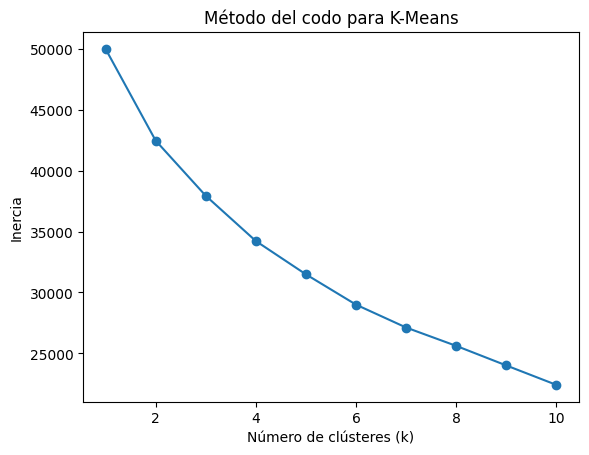

In [7]:
plt.figure()
plt.plot(K, inertias, marker='o')
plt.xlabel("Número de clústeres (k)")
plt.ylabel("Inercia")
plt.title("Método del codo para K-Means")
plt.show()


El valor de *k = 4* se considera el número óptimo de clústeres porque representa un punto de equilibrio entre la reducción de la inercia y la complejidad del modelo.
Hasta este punto, aumentar el número de clústeres mejora notablemente la cohesión interna de los grupos. Sin embargo, a partir de k = 4, la disminución de la inercia es menos significativa, lo que indica que agregar más clústeres no aporta una mejora sustancial en la calidad del agrupamiento.
Por esta razón, k = 4 permite obtener clústeres bien definidos sin hacer el modelo innecesariamente complejo.

---
## <font color='264CC7'> Asignación de grupos y análisis </font>


<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Realiza un análisis de los grupos obtenidos.
<ul>
  <li>Asigna los grupos.</li>
  <li>Revisa la media de cada grupo.</li>
  <li>Revisa el mínimo y máximo de cada grupo.</li>
  <li>Muestra algunos integrantes de cada grupo.</li>
</ul>
</div>

In [12]:
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

data["Cluster"] = clusters
data.groupby("Cluster")[features].mean()

data.groupby("Cluster")[features].agg(["min", "max"])

for cluster in sorted(data["Cluster"].unique()):
    print(f"\nCluster {cluster}")
    display(
        data[data["Cluster"] == cluster]
        .head()[["Customer_ID"] + features]
    )



Cluster 0


,Customer_ID,Purchase_Frequency,Average_Order_Value,Time_Between_Purchases,Churn_Probability,Lifetime_Value
8,CUST_8E2Q1K,7,165.26,73,0.17,9943.51
10,CUST_67Z31H,8,138.72,88,0.45,2758.76
31,CUST_2KHJ4Y,1,138.29,66,0.27,2053.08
36,CUST_NMIM67,5,37.72,79,0.16,9937.12
40,CUST_V6TG3I,4,182.98,59,0.94,4384.96



Cluster 1


,Customer_ID,Purchase_Frequency,Average_Order_Value,Time_Between_Purchases,Churn_Probability,Lifetime_Value
1,CUST_AJU17N,10,64.89,6,0.66,5427.51
4,CUST_OK6PUM,18,42.39,10,0.52,8557.70
5,CUST_63F5GB,12,132.90,42,0.25,8215.33
9,CUST_4VB1T5,6,52.86,60,0.59,9978.11
11,CUST_FX276G,13,54.53,53,0.73,9395.60



Cluster 2


,Customer_ID,Purchase_Frequency,Average_Order_Value,Time_Between_Purchases,Churn_Probability,Lifetime_Value
0,CUST_9HOS83,17,172.57,45,0.98,952.81
6,CUST_P9K9F2,16,128.43,38,0.94,7031.07
7,CUST_EMHZQV,10,67.52,56,0.56,5167.16
13,CUST_7KEA4I,18,30.56,83,0.55,1005.72
16,CUST_EF8557,10,139.31,78,0.78,6578.30



Cluster 3


,Customer_ID,Purchase_Frequency,Average_Order_Value,Time_Between_Purchases,Churn_Probability,Lifetime_Value
2,CUST_11XNYF,3,120.38,23,0.60,3994.80
3,CUST_IGH8G3,12,70.34,5,0.78,4880.01
20,CUST_99ZA53,17,105.73,36,0.66,194.59
23,CUST_5RUZ9U,11,106.34,41,0.17,627.20
26,CUST_2H3FIT,11,138.91,36,0.45,1699.10


<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Da una descripción de los grupos obtenidos. Asigna un nombre a cada grupo.
</div>

**CLUSTER 0: clientes ocasionales con comportamiento irregular:** Este grupo presenta clientes con frecuencias de compra bajas a medias, valores de compra variables y tiempos largos entre compras. El valor de Lifetime Value es heterogéneo, con algunos clientes de alto valor y otros más bajos.
La probabilidad de abandono es moderada, lo que indica clientes relativamente inestables pero aún recuperables.


**CLUSTER 1: clientes activos y valiosos que requieren estrategias de fidelización:** Los clientes de este clúster tienen una alta frecuencia de compra, tiempos cortos entre compras y un Lifetime Value elevado. Sin embargo, la probabilidad de churn es media a alta, lo que sugiere que, aunque compran con frecuencia, podrían estar en riesgo de abandono.


**CLUSTER 2: clientes frecuentes pero de alto riesgo.** Este grupo se caracteriza por una alta frecuencia de compra, pero con probabilidades de churn muy altas. Además, algunos clientes presentan valores bajos de Lifetime Value, lo que indica que, aunque compran con frecuencia, no generan tanto valor a largo plazo o están cerca de abandonar.


**CLUSTER 3: clientes promedio o de bajo valor:** Los clientes de este clúster muestran frecuencia de compra media, valores de compra moderados y un Lifetime Value generalmente bajo. La probabilidad de churn varía, pero tiende a ser moderada, lo que indica clientes de menor impacto económico.

---
## <font color='264CC7'> Visualizaciones  </font>

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Realiza una visualización de los grupos obtenidos en 2D seleccionando dos variables que creas relevantes.
<ul>
  <li>¿Qué tan buenos te parecen los grupos?</li>
</ul>
</div>

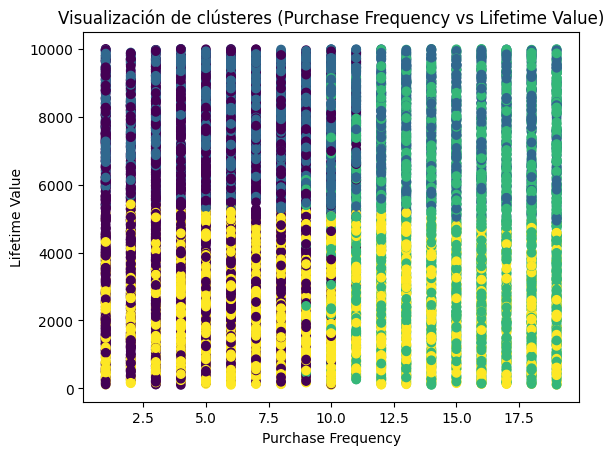

In [15]:
plt.figure()
plt.scatter(
    data["Purchase_Frequency"],
    data["Lifetime_Value"],
    c=data["Cluster"]
)
plt.xlabel("Purchase Frequency")
plt.ylabel("Lifetime Value")
plt.title("Visualización de clústeres (Purchase Frequency vs Lifetime Value)")
plt.show()


<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Realiza una visualización de los grupos obtenidos en 2D usando reducción de dimensionalidad diferente a PCA.
<ul>
  <li>¿Qué tan buenos te parecen los grupos?</li>
  <li>Indica el porcentaje de la variaza explicada en el gráfico, ¿afecta esto a tu visualización?</li>
</ul>
</div>

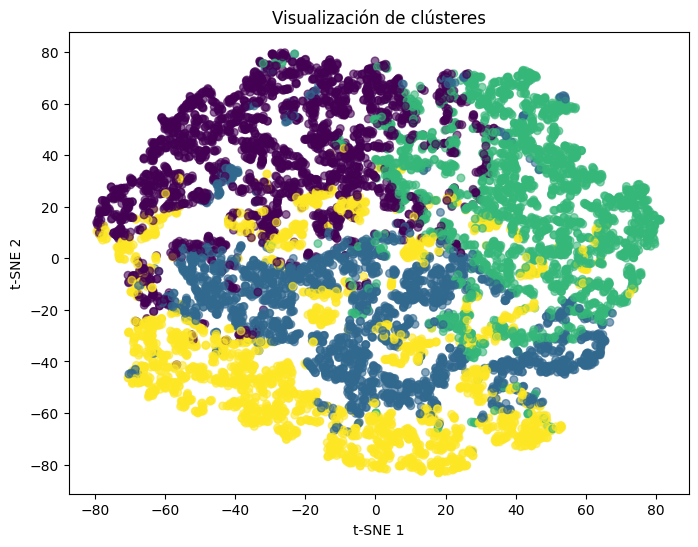

In [17]:
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(
    X_tsne[:, 0],
    X_tsne[:, 1],
    c=data["Cluster"],
    alpha=0.6,
    s=30
)
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.title("Visualización de clústeres")
plt.show()


In [18]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

pca.explained_variance_ratio_, pca.explained_variance_ratio_.sum()


(array([0.20370766, 0.20268292]), np.float64(0.40639058031362263))

El porcentaje de varianza explicada en dos dimensiones es relativamente bajo, lo que indica que una parte importante de la información original del conjunto de datos se pierde al proyectarlo en 2D.
Esto afecta la visualización en el sentido de que los clústeres pueden parecer más solapados o menos definidos de lo que realmente son en el espacio original de mayor dimensión.
Sin embargo, la visualización sigue siendo útil para un análisis exploratorio, ya que permite identificar patrones generales y relaciones entre los grupos.

---
## <font color='264CC7'> Métricas  </font>

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
Calcula la métrica de la silueta para los grupos obtenidos. ¿Qué tan buenos te parecen los grupos?
</div>

In [19]:
silhouette_avg = silhouette_score(X_scaled, data["Cluster"])
silhouette_avg


np.float64(0.14267516453772883)

El coeficiente de silueta obtenido es aproximadamente 0.14, lo que indica que la calidad de los clústeres es moderada-baja.
Esto sugiere que, aunque el modelo logra identificar ciertos patrones en los datos, existe un solapamiento importante entre los grupos.
Este resultado es consistente con las visualizaciones realizadas, donde los clústeres no presentan una separación completamente definida.
Aun así, la segmentación es útil para un análisis exploratorio de clientes en un contexto real.